> # **DATASET OF EDX COURSES**

---










> # **TEAM MEMBERS**

**1.**   **Sanyam Bothra-E20CSE151**

**2.**   **Ishita Goyal-E20CSE153**

**3.**   **Sneha Gupta-E20CSE154**







> # **Step 1 - Select a real-world dataset**



**We have taken the dataset of edx courses till 2020.**

**The following are the analytic tasks we have performed:**

**TASK 1-What is the optimum course length of the courses?**

**TASK 2-How many courses provide Introductory, Intermediate and Advanced levels?**

**TASK 3-What is number of courses offered by each subject?**

**TASK 4-Which University is providing most courses?**

**TASK 5-What is the mean price offered by every subject?**

**TASK 6 - Which course length has the maximum enrollments?**

**TASK 7 - What is the number of enrollments in each level?**

**The working of this project is based on Pandas and various data visualization libraries of Python:**



**1.**   **Matplotlib**

**2.**   **Plotly**

**3. Seaborn**




In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
edx=pd.read_csv("edx_courses.csv")          #To read the csv file and create a dataframe edx
edx


,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https:



> # **Step 2 - Perform Data Preparation and Cleaning**



# **DATA CLEANING**
**We have loaded the dataset into data frame using Pandas. Our dataset is in the CSV format which has 975 rows x 16 columns.**

**We will be cleaning some of the columns from our orginal data:**

*   **course_description**
*   **course_syllabus**
*   **course_url**
*   **summary**
*   **language**
*   **subtitles**

**Also, we will be deleting some of the records which have null value and creating additional columns by splitting the original columns.**

**The above data cleaning will help in better understanding, clear data visualization and analysis.**







In [3]:
edx.drop(["course_description","course_syllabus","course_url","summary","language","subtitles"],axis=1,inplace=True)   #Dropping the columns which are not required in analysis
edx['n_enrolled']=edx['n_enrolled'].str.replace(',','')                                                                #To remove ',' and replace it with blank space
edx.dropna(subset = ["n_enrolled"], inplace=True)                                                                      # Droping the NaN values from n_enrolled
edx=edx.reset_index(drop=True)                                                                                         #To reset the index of the table 
edx                                                                                                                    #calling dataframe to display

,title,n_enrolled,course_type,institution,instructors,Level,subject,course_effort,course_length,price
0,How to Learn Online,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD
...,...,...,...,...,...,...,...,...,...,...
850,StudioX: Creating a Course with edX Studio,20355,Self-paced on your time,edX,Nina Huntemann-Ben Piscopo,Introductory,Education & Teacher Training,4–6 hours per week,3 Weeks,FREE-Add a Verified Certificate for $99 USD
851,Introducción a las ondas gravitacionales,8657,Self-paced on your time,Universidad Nacional de Córdoba,Gabriela González,Introductory,Science,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $50 USD
852,Global China: From the Mongols to the Ming,41902,Self-paced on your time,Harvard University,Peter K. Bol-William C. Kirby,Introductory,History,1–3 hours per week,15 Weeks,FREE-Add a Verified Certificate for $139 USD
853,Computational Neuroscience: Neuronal Dynamics ...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD


# **Splitting of price column**

In [4]:
z=edx['price'].str.split('FREE-Add a Verified Certificate for').str.get(1)      #To extract the $cost USD by using splitting at 'FREE-Add a Verified Certificate for'
z

edx['cost of verified certificate']=None                                        #Creating a new column and declaring it with none values for every row
index_description=edx.columns.get_loc('title')                                  # Taking reference of index from 'title' column
index_date=edx.columns.get_loc('cost of verified certificate')                  #To set the index of cost column accroding to 'title'
e=z.str.split('$')                                                              #To remove dollar from the entries in cost column
for i in range(0,855):
    t=(e[i][1])                                                                 #Creating a variable t and storing number+USD
    b=t.split()                                                                 #splitting t according to space and storing only numerical value in b
    edx.iat[i,index_date]=b[0]          
edx

,title,n_enrolled,course_type,institution,instructors,Level,subject,course_effort,course_length,price,cost of verified certificate
0,How to Learn Online,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,49
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,49
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,90
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,199
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,249
...,...,...,...,...,...,...,...,...,...,...,...
850,StudioX: Creating a Course with edX Studio,20355,Self-paced on your time,edX,Nina Huntemann-Ben Piscopo,Introductory,Education & Teacher Training,4–6 hours per week,3 Weeks,FREE-Add a Verified Certificate for $99 USD,99
851,Introducción a las ondas gravitacionales,8657,Self-paced on your time,Universidad Nacional de Córdoba,Gabriela González,Introductory,Science,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $50 USD,50
852,Global China: From the Mongols to the Ming,41902,Self-paced on your time,Harvard University,Peter K. Bol-William C. Kirby,Introductory,History,1–3 hours per week,15 Weeks,FREE-Add a Verified Certificate for $139 USD,139
853,Computational Neuroscience: Neuronal Dynamics ...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,139


# **Splitting of course_length column**

In [5]:
edx[['course_length', 'course_int']] = edx['course_length'].str.split(' ', 1, expand=True)    #To extract integer part from course length column
edx.drop(["course_int"],axis=1,inplace=True)                                                  #Dropping the course_int column as it is not required
edx

,title,n_enrolled,course_type,institution,instructors,Level,subject,course_effort,course_length,price,cost of verified certificate
0,How to Learn Online,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,2–3 hours per week,2,FREE-Add a Verified Certificate for $49 USD,49
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,2–4 hours per week,7,FREE-Add a Verified Certificate for $49 USD,49
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,6–18 hours per week,12,FREE-Add a Verified Certificate for $90 USD,90
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,10–15 hours per week,13,FREE-Add a Verified Certificate for $199 USD,199
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,5–7 hours per week,4,FREE-Add a Verified Certificate for $249 USD,249
...,...,...,...,...,...,...,...,...,...,...,...
850,StudioX: Creating a Course with edX Studio,20355,Self-paced on your time,edX,Nina Huntemann-Ben Piscopo,Introductory,Education & Teacher Training,4–6 hours per week,3,FREE-Add a Verified Certificate for $99 USD,99
851,Introducción a las ondas gravitacionales,8657,Self-paced on your time,Universidad Nacional de Córdoba,Gabriela González,Introductory,Science,5–7 hours per week,4,FREE-Add a Verified Certificate for $50 USD,50
852,Global China: From the Mongols to the Ming,41902,Self-paced on your time,Harvard University,Peter K. Bol-William C. Kirby,Introductory,History,1–3 hours per week,15,FREE-Add a Verified Certificate for $139 USD,139
853,Computational Neuroscience: Neuronal Dynamics ...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,4–6 hours per week,6,FREE-Add a Verified Certificate for $139 USD,139


# **Implementing data through HEAT MAP**

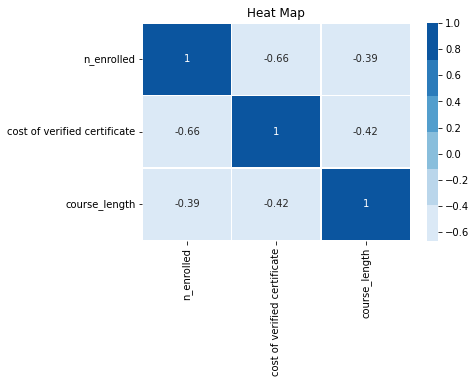

In [6]:
dx=edx[['n_enrolled','cost of verified certificate','course_length']]           #creating a dataframe dx consisting of 'n_enrolled','cost of verified certificate','course_length'
corre = dx.astype('float64').corr()                                             #converting the datatype of elements from string to float
  
data_set = corre.corr()                                                         #calling function corr to create heat map    
colormap = sns.color_palette("Blues")                                           #Setting color to blue for heat map
ax = sns.heatmap(data_set, linewidth = 0.5, annot=True, cmap = colormap )       #Code to create a heat map
  
plt.title("Heat Map")                                                           #Giving title as "Heat Map"
plt.show()                                                                      #To show the map

# **NOTE**✍ 

✔ **Above heatmap is for analysing the correlation between different columns of a dataset:**

*   **n_enrolled**

*   **cost of verified certificate**

*   **course_length**

✔ **You can see a vertical line around the heatmap, this is a color bar. It clearly indicates that, for higher value, the color is dark and for lower value, the color is a lighter shade.**

✔ **Above chart is made using Seaborn.**










> # **Step 3 and 4 - Perform exploratory analysis and visualization. Ask and answer questions about data**



# **TASK 1 - What is the optimum course length of the courses?**

In [7]:
edx['course_length']                                                                  #Displaying the course length of every row

0       2
1       7
2      12
3      13
4       4
       ..
850     3
851     4
852    15
853     6
854     1
Name: course_length, Length: 855, dtype: object

# **Taking out mean course length**

In [8]:
l=[]                                                                            #declaring a list to store the value of course_length    
sum=0   
p=0
for i in edx["course_length"]:                                                  #loop to find total course course_length and appending it to list
    p+=1
    w=int(i)
    sum+=w
    l.append(i)
print(sum/p)                                                                    #printing the mean course_length

6.851461988304093


**The mean course length deduced is 6.85.**

# **Implementing data through BUBBLE CHART**

In [9]:
g=edx['course_length']                                                          #Creating dataframe g storing course_length details
t=[]                                                                            #Creating empty list  
p=[]                                                                            
p.append(g)                                                                     #Storing values of dataframe to p list
for i in range(0,855):                                                            
    t.append(p[0][i])                                                           #Appending the course_length to t
l = t
l = Counter(l).most_common()                                                    #Storing the each week with their occurance in the list l
m1=[]                                                                           #Creating a list to store weeks
for i in range (0,len(l)):                                                    
    m1.append(l[i][0])                                                          #Appending weeks to m1

m2=[]                                                                           #creating list to store count of each week
for i in range (0,len(l)):
    m2.append(l[i][1])                                                          #Appending to m2

for i in range(0,len(m1)):                                                      
    m1[i]=m1[i]+" weeks"                                                        #Concating the number with weeks in m1
print(m1)    
print(m2)                                                              

['6 weeks', '4 weeks', '5 weeks', '7 weeks', '10 weeks', '8 weeks', '12 weeks', '3 weeks', '9 weeks', '15 weeks', '2 weeks', '14 weeks', '16 weeks', '1 weeks', '13 weeks', '11 weeks', '18 weeks', '17 weeks']
[173, 159, 119, 83, 80, 77, 34, 26, 20, 18, 16, 15, 12, 7, 6, 6, 3, 1]


In [10]:
fig = go.Figure(data=[go.Scatter( 
    x=m1, y=m2,
    mode='markers',
    marker=dict(
        color=[120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 190, 200, 205],                                   #Selecting colors for graph
        opacity=[0.6],
        size=[120, 115, 110, 105, 100, 95, 90 ,85, 80, 75 ,70, 65, 60, 55, 50, 45, 40, 35],showscale=True,                                   #Defining the size of each bubble in chart
    )
)])

fig.update_layout(
    title='Optimum course length of courses',                                      #title of the bubble chart
  yaxis=dict(                                                                   #Assigning attributes to Y axis
        title='Course Length',                                                  
        gridcolor='white',
        gridwidth=2,
    ),

    xaxis=dict(                                                                 #Assigning attributes to X axis
        title='Weeks',  
        gridcolor='white',
        gridwidth=4,
    ),
    paper_bgcolor='rgb(243, 243, 243)',                                         #Colors for the backgroungd bubble chart
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()                                                                      #To display scatter bubble chart

# **NOTE**✍

✔  **Bubble chart is primarily used to depict and show relationships between numeric variables.**

✔ **In the bubble chart above, each bubble represents duration of weeks, its area is proportional to its count of course length.**

✔ **From the above bubble chart, the course length of 6 weeks has the most count which means many courses have the course length of 6 weeks and course length 17 weeks has the least count.**

✔ **Above chart is made using Plotly.**


# **TASK 2 - How many courses provide Introductory, Intermediate and Advanced levels?**

In [11]:
t=[]                                                                          #List to store the introductory , intermediate and advanced course 
t1=[]                                                                         # List to store the count of introductory , intermediate and advanced level
t.append(edx['Level'].value_counts())
for i in range(0,3):
  t1.append(t[0][i])                                                          #appending list
print(t1)                                                                     # Print the list in which 0 index has number of introductory level , 1 index has number of intermediate level ,
                                                                              #  2 index has number of advanced level

[542, 237, 76]


# **Implementing data through RADAR CHART**

In [12]:
fig = go.Figure(data=go.Scatterpolar(r=t1, theta=['Introductory','Intermediate', 'Advanced'], fill='toself'))             #For making radar chart where r is the count and theta is the levels
fig.update_layout(polar=dict(radialaxis=dict(visible=True),),showlegend=True)                                             #For making the radial axis and scale
fig.show()                                                                                                                #To display radar chart

# **NOTE**✍

✔ **A radar chart is an informative visual tool in which multiple variables are compared on a two-dimensional plane. Axes emerge from a common central point and all the axes are equally distributed and uniformly drawn from each other.**

✔ **From the above radar chart, we can see that majority of the courses by edx are Introductory and the least are Advanced.**

✔ **Above chart is made using Plotly.**

# **TASK 3 -	What is number of courses offered by each subject?**

# **Implementing data through BAR GRAPH**

Text(0, 0.5, 'Number of Courses')

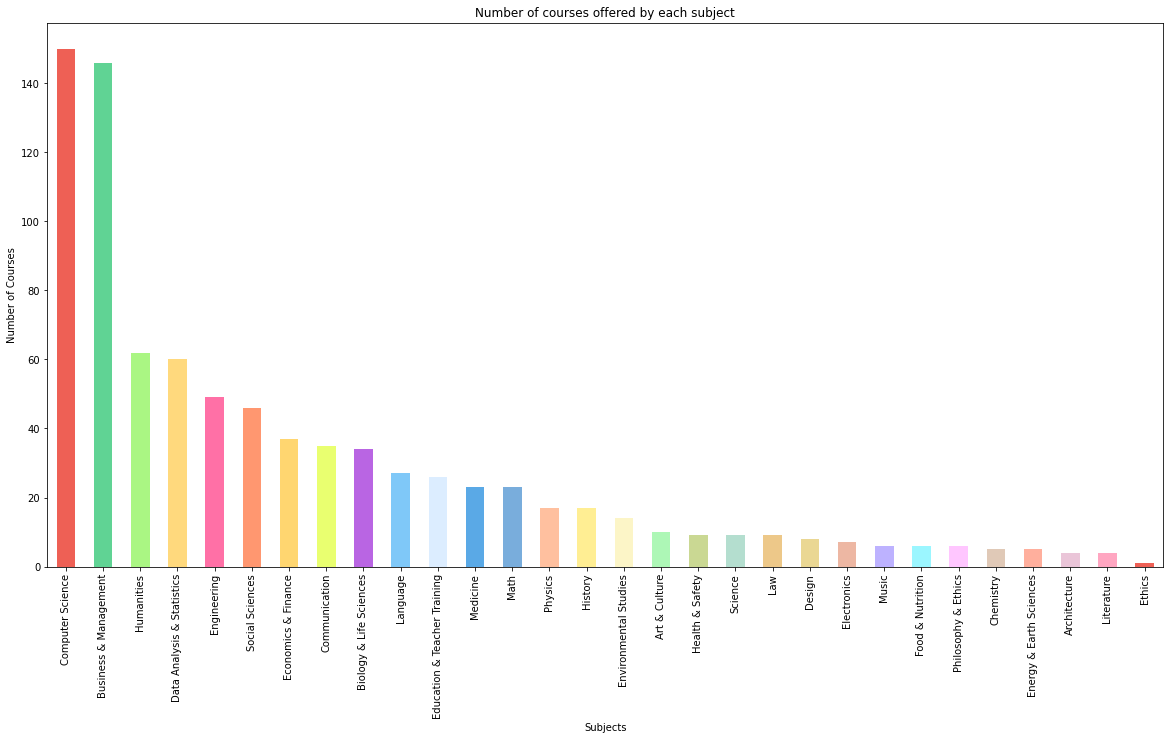

In [13]:
bar_edx=edx['subject'].value_counts()
bar_edx.plot(kind='bar',figsize=(20,10), title="Number of courses offered by each subject", color=['#ee6055','#60d394','#aaf683','#ffd97d',
                                                                              '#ff70a6','#ff9770','#ffd670','#e9ff70','#b965e3',
                                                                              '#7fc8f8','#dcedff','#5aa9e6','#79addc','#ffc09f',
                                                                              '#ffee93','#fcf5c7','#adf7b6','#cad893','#b4decf',
                                                                              '#edc889','#ead793','#edb7a3','#bdb2ff','#9bf6ff',
                                                                              '#ffc6ff','#e0c9b7','#ffaf9d','#eac5d8','#ffa6c1'])        #code To make bar graph

      
plt.xlabel("Subjects")     #Declaring x axis as Subjects
plt.ylabel("Number of Courses")  #Declaring y axis as Number of courses

# **NOTE**✍

✔ **Bar graphs are used to compare things between different groups or to track changes over time.**

✔ **The above bar graph is a decreasing graph, we can see that the maximun courses are offered by Computer Science and least courses are offered by Ethics.**

✔ **Above chart is made using Matplotlib.**

# **TASK 4 - Which University is providing most courses?**

# **Implementing data through PIE CHART**

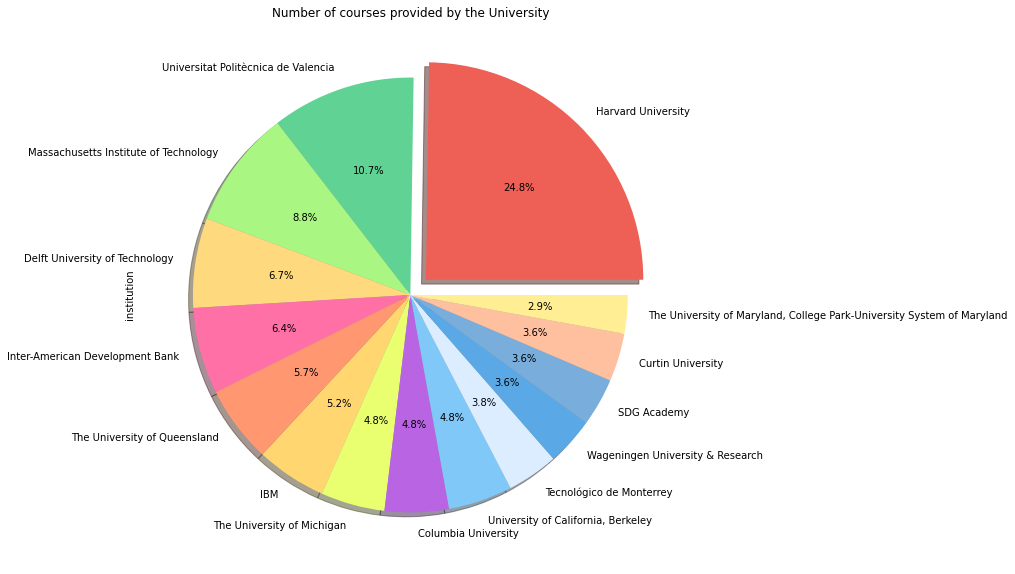

In [14]:
x=edx['institution'].value_counts().head(15)
x.plot(kind='pie',figsize=(13,10), title="Number of courses provided by the University", autopct='%1.1f%%', shadow=True, startangle=0,                                        #To create a pie chart by declaring kind ,size and other attributes 
       explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), colors = ['#ee6055','#60d394','#aaf683','#ffd97d','#ff70a6','#ff9770','#ffd670',        
                                                                            '#e9ff70','#b965e3','#7fc8f8','#dcedff','#5aa9e6','#79addc','#ffc09f','#ffee93',                          
                                                                            '#fcf5c7','#adf7b6','#cad893','#b4decf','#edc889','#ead793','#edb7a3',
                                                                            '#bdb2ff','#9bf6ff','#ffc6ff','#e0c9b7','#ffaf9d','#eac5d8','#ffa6c1'])                           #Declaring color coding for pie chart



# **NOTE**✍

✔ **A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data.** 

✔ **We have taken top 15 universities and henceforth we can conclude that most of the courses are offered by Harvard University and the least by The University of Maryland, College Park-University System of Maryland.**

✔ **Above chart is made using Matplotlib.**

# **TASK 5-What is the Mean price offered by every subject?**

In [15]:
l1=[]    #Declaring a list to store mean cost of different subjects


In [16]:
p2=edx[edx['subject']=='Computer Science']                                    #Creating a dataframe p2 of computer science
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame
 
l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of computer Science and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list  
for x in l54:                                                                 #loop for the values in l54   
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                             
sum=0                                                                         #To Find sum of all the cost of courses in computer science
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                                                     #To find mean of the cost 
l1.append(a)                                                                  #Appending mean of computer Science to l1
print(l1)                                                                     #To print list

[126.45533333333336]


In [17]:
p2=edx[edx['subject']=='Data Analysis & Statistics']                          #Creating a dataframe p2 of Data Analysis & Statistics
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Data Analysis & Statistics and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list
for x in l54:                                                                 #loop for the values in l54
    l32.append(float(x))                                                      #To convert the integer values to float
l32
sum=0                                                                         #To Find sum of all the cost of courses in computer science
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l1.append(a)                                                                  #Appending mean of Data Analysis & Statistics to l1
print(l1)                                                                     #To print list

[126.45533333333336, 99.91666666666667]


In [18]:
p2=edx[edx['subject']=='Education & Teacher Training']                        #Creating a dataframe p2 of Education & Teacher Training
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Education & Teacher Training and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Education & Teacher Training
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l1.append(a)                                                                  #Appending mean of Education & Teacher Training to l1
print(l1)                                                                     #To print list

[126.45533333333336, 99.91666666666667, 87.0]


In [19]:
p2=edx[edx['subject']=='Science']                                             #Creating a dataframe p2 of Science
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Science and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Science
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l1.append(a)                                                                  #Appending mean of Science to l1
print(l1)                                                                     #To print list

[126.45533333333336, 99.91666666666667, 87.0, 63.888888888888886]


In [20]:
p2=edx[edx['subject']=='History']                                             #Creating a dataframe p2 of History
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of History and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in History
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l1.append(a)                                                                  #Appending mean of History to l1
print(l1)                                                                     #To print list

[126.45533333333336, 99.91666666666667, 87.0, 63.888888888888886, 89.3529411764706]


In [21]:
p2=edx[edx['subject']=='Biology & Life Sciences']                             #Creating a dataframe p2 of Biology & Life Sciences
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Biology & Life Sciences and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Biology & Life Sciences
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l1.append(a)                                                                  #Appending mean of Biology & Life Sciences to l1
print(l1)                                                                     #To print list

[126.45533333333336, 99.91666666666667, 87.0, 63.888888888888886, 89.3529411764706, 88.20588235294117]


In [22]:
p2=edx[edx['subject']=='Environmental Studies']                               #Creating a dataframe p2 of Environmental Studies
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Environmental Studies and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Environmental Studies
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l1.append(a)                                                                  #Appending mean of Environmental Studies to l1
print(l1)                                                                     #To print list

[126.45533333333336, 99.91666666666667, 87.0, 63.888888888888886, 89.3529411764706, 88.20588235294117, 70.07142857142857]


In [23]:
p2=edx[edx['subject']=='Humanities']                                          #Creating a dataframe p2 of Humanities
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Humanities and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Humanities
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l1.append(a)                                                                  #Appending mean of Humanities to l1
print(l1)                                                                     #To print list

[126.45533333333336, 99.91666666666667, 87.0, 63.888888888888886, 89.3529411764706, 88.20588235294117, 70.07142857142857, 65.74177419354838]


In [24]:
p2=edx[edx['subject']=='Ethics']                                              #Creating a dataframe p2 of Ethics
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Ethics and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Ethics
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l1.append(a)                                                                  #Appending mean of Ethics to l1
print(l1)                                                                     #To print list

[126.45533333333336, 99.91666666666667, 87.0, 63.888888888888886, 89.3529411764706, 88.20588235294117, 70.07142857142857, 65.74177419354838, 49.0]


In [25]:
p2=edx[edx['subject']=='Health & Safety']                                     #Creating a dataframe p2 of Health & Safety
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Health & Safety and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Health & Safety
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l1.append(a)                                                                  #Appending mean of Health & Safety to l1
print(l1)                                                                     #To print list

[126.45533333333336, 99.91666666666667, 87.0, 63.888888888888886, 89.3529411764706, 88.20588235294117, 70.07142857142857, 65.74177419354838, 49.0, 67.88888888888889]


In [26]:
p2=edx[edx['subject']=='Food & Nutrition']                                    #Creating a dataframe p2 of Food & Nutrition
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Food & Nutrition and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Food & Nutrition
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l1.append(a)                                                                  #Appending mean of Food & Nutrition to l1
print(l1)                                                                     #To print list

[126.45533333333336, 99.91666666666667, 87.0, 63.888888888888886, 89.3529411764706, 88.20588235294117, 70.07142857142857, 65.74177419354838, 49.0, 67.88888888888889, 65.83333333333333]


In [27]:
p2=edx[edx['subject']=='Business & Management']                               #Creating a dataframe p2 of Business & Management
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Business & Management and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Business & Management
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l1.append(a)                                                                  #Appending mean of Business & Management to l1
print(l1)                                                                     #To print list

[126.45533333333336, 99.91666666666667, 87.0, 63.888888888888886, 89.3529411764706, 88.20588235294117, 70.07142857142857, 65.74177419354838, 49.0, 67.88888888888889, 65.83333333333333, 135.25342465753425]


In [28]:
p2=edx[edx['subject']=='Social Sciences']                                     #Creating a dataframe p2 of Social Sciences
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Social Sciences and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Social Sciences
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l1.append(a)                                                                  #Appending mean of Social Sciences to l1
print(l1)                                                                     #To print list

[126.45533333333336, 99.91666666666667, 87.0, 63.888888888888886, 89.3529411764706, 88.20588235294117, 70.07142857142857, 65.74177419354838, 49.0, 67.88888888888889, 65.83333333333333, 135.25342465753425, 77.26086956521739]


In [29]:
l1  #Printing the list of mean of all subjects

[126.45533333333336,
 99.91666666666667,
 87.0,
 63.888888888888886,
 89.3529411764706,
 88.20588235294117,
 70.07142857142857,
 65.74177419354838,
 49.0,
 67.88888888888889,
 65.83333333333333,
 135.25342465753425,
 77.26086956521739]

# **Implementing data through DONUT CHART**

In [30]:
labels = ['Computer Science','Data Analysis & Statistics','Education & Teacher Training','Science','History',
          'Biology & Life Sciences','Environmental Studies','Humanities','Ethics','Health & Safety',
          'Food & Nutrition','Business & Management','Social Sciences']                                      #Declaring labels of the subjects for which we have calculated mean
values = l1                                                                                                  #Assigning values to l1
fig = go.Figure(data=[go.Pie(labels=labels, values=l1, hole=0.4)])                                           #Code create a donut chart
fig.update_layout(title_text="Mean price offered by each course", annotations=[dict(text='Mean', x=0.50, y=0.5, font_size=20, showarrow=False)]) #Add annotations in the center of the donut pies.
fig.show()                                                                                                                                             #Displaying the donut chart

# **NOTE**✍
✔ **Donut Charts are a special kind of Pie chart with the difference that it has a Blank Circle at the center. This empty space can be used to display additional data. It is used for displaying percentage data for categorical variables with a limited number of groups.**

✔ **The above donut chart indicates the mean price offered by each course in percentage.**

✔ **Above chart is made using Plotly.**

# **Implemented data through SCATTER PLOT**

(remaining data from the subjects)

In [31]:
l2=[]                                                                          #Declaring a list to store mean cost of different subjects

In [32]:
p2=edx[edx['subject']=='Engineering']                                         #Creating a dataframe p2 of Engineering
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Engineering and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Engineering
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l2.append(a)                                                                  #Appending mean of Engineering to l2
print(l2)   

[122.10204081632654]


In [33]:
p2=edx[edx['subject']=='Economics & Finance']                                 #Creating a dataframe p2 of Economics & Finance
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Economics & Finance and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Economics & Finance
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l2.append(a)                                                                  #Appending mean of Economics & Finance to l2
print(l2)   

[122.10204081632654, 75.15918918918919]


In [34]:
p2=edx[edx['subject']=='Communication']                                     #Creating a dataframe p2 of Communication
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Communication and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Communication
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l2.append(a)                                                                  #Appending mean of Communication to l2
print(l2)   

[122.10204081632654, 75.15918918918919, 83.42857142857143]


In [35]:
p2=edx[edx['subject']=='Language']                                            #Creating a dataframe p2 of Language
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Language and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Language
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l2.append(a)                                                                  #Appending mean of Language to l2
print(l2)   

[122.10204081632654, 75.15918918918919, 83.42857142857143, 84.03703703703704]


In [36]:
p2=edx[edx['subject']=='Math']                                                #Creating a dataframe p2 of Math
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Math and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Math
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l2.append(a)                                                                  #Appending mean of Math to l2
print(l2) 

[122.10204081632654, 75.15918918918919, 83.42857142857143, 84.03703703703704, 66.1304347826087]


In [37]:
p2=edx[edx['subject']=='Medicine']                                            #Creating a dataframe p2 of Medicine
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Medicine and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Medicine
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l2.append(a)                                                                  #Appending mean of Medicine to l2
print(l2) 

[122.10204081632654, 75.15918918918919, 83.42857142857143, 84.03703703703704, 66.1304347826087, 104.30434782608695]


In [38]:
p2=edx[edx['subject']=='Physics']                                     #Creating a dataframe p2 of Physics
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Physics and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Physics
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l2.append(a)                                                                  #Appending mean of Physics to l2
print(l2) 

[122.10204081632654, 75.15918918918919, 83.42857142857143, 84.03703703703704, 66.1304347826087, 104.30434782608695, 65.11764705882354]


In [39]:
p2=edx[edx['subject']=='Chemistry']                                     #Creating a dataframe p2 of Chemistry
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Chemistry and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Chemistry
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l2.append(a)                                                                  #Appending mean of Chemistry to l2
print(l2) 

[122.10204081632654, 75.15918918918919, 83.42857142857143, 84.03703703703704, 66.1304347826087, 104.30434782608695, 65.11764705882354, 74.2]


In [40]:
p2=edx[edx['subject']=='Design']                                              #Creating a dataframe p2 of Design
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Design and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Design
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l2.append(a)                                                                  #Appending mean of Design to l2
print(l2) 

[122.10204081632654, 75.15918918918919, 83.42857142857143, 84.03703703703704, 66.1304347826087, 104.30434782608695, 65.11764705882354, 74.2, 98.75]


In [41]:
p2=edx[edx['subject']=='Music']                                               #Creating a dataframe p2 of Music
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Music and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Music
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l2.append(a)                                                                  #Appending mean of Music to l2
print(l2) 

[122.10204081632654, 75.15918918918919, 83.42857142857143, 84.03703703703704, 66.1304347826087, 104.30434782608695, 65.11764705882354, 74.2, 98.75, 65.66666666666667]


In [42]:
p2=edx[edx['subject']=='Electronics']                                         #Creating a dataframe p2 of Electronics
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Electronics and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Electronics
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l2.append(a)                                                                  #Appending mean of Electronics to l2
print(l2) 

[122.10204081632654, 75.15918918918919, 83.42857142857143, 84.03703703703704, 66.1304347826087, 104.30434782608695, 65.11764705882354, 74.2, 98.75, 65.66666666666667, 103.71428571428571]


In [43]:
p2=edx[edx['subject']=='Energy & Earth Sciences']                             #Creating a dataframe p2 of Energy & Earth Sciences
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Energy & Earth Sciences and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Energy & Earth Sciences
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l2.append(a)                                                                  #Appending mean of Energy & Earth Sciences to l2
print(l2) 

[122.10204081632654, 75.15918918918919, 83.42857142857143, 84.03703703703704, 66.1304347826087, 104.30434782608695, 65.11764705882354, 74.2, 98.75, 65.66666666666667, 103.71428571428571, 150.2]


In [44]:
p2=edx[edx['subject']=='Architecture']                                        #Creating a dataframe p2 of Architecture
p2=p2.reset_index(drop=True)                                                  #To Reset index in p2 frame

l21=[]                                                                        #Creating a list 
l21.append(p2['cost of verified certificate'])                                #appending l21 with the cost of Architecture and index

l54=[]                                                                        #Creating a list
for i in range(len(p2['cost of verified certificate'])):                      #To initialise a loop from zero till length of 'cost'
    l54.append(l21[0][i])                                                     #To append cost by dropping the index value
l32=[]                                                                        #Creating another list 
for x in l54:                                                                 #loop for the values in l54  
    l32.append(float(x))                                                      #To convert the integer values to float
l32                                                                         
sum=0                                                                         #To Find sum of all the cost of courses in Architecture
for i in l32:
    sum+=i                                                                    #Incrementing value of sum
a=(sum/(len(p2['cost of verified certificate'])))                             #To find mean of the cost 
l2.append(a)                                                                  #Appending mean of Architecture to l2
print(l2) 

[122.10204081632654, 75.15918918918919, 83.42857142857143, 84.03703703703704, 66.1304347826087, 104.30434782608695, 65.11764705882354, 74.2, 98.75, 65.66666666666667, 103.71428571428571, 150.2, 62.0]


Text(0.5, 1.0, 'Mean price offered by each course')

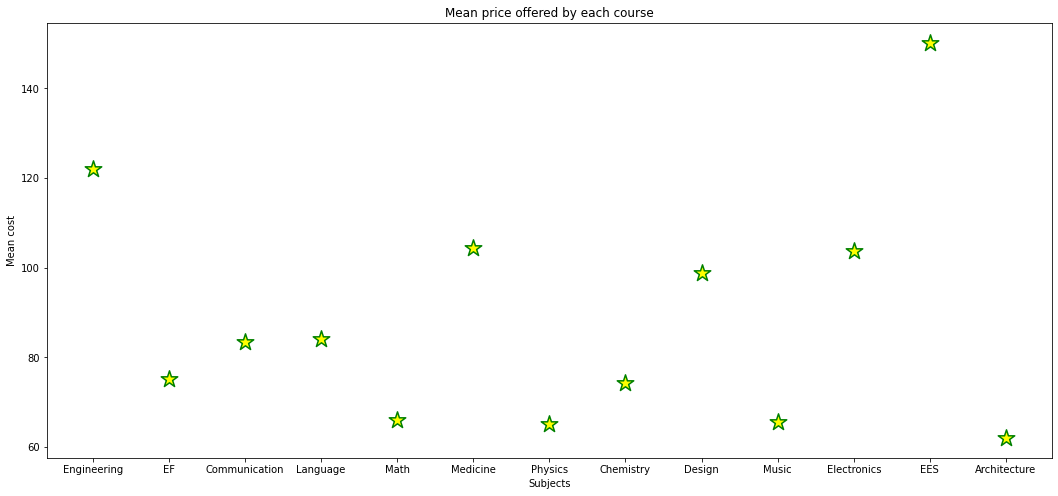

In [45]:
x=['Engineering','EF','Communication','Language','Math','Medicine',            #Declaring x.
          'Physics','Chemistry','Design','Music','Electronics',
          'EES','Architecture']
y=l2                                                                           #Declaring l2 list in y.
plt.figure(figsize=(18, 8))                                                    #Making the scatter plot.
plt.scatter(x, y, c ="yellow",
            linewidths = 1.5,
            marker ="*", 
            edgecolor ="green", 
            s = 300)

plt.xlabel("Subjects")                                                         #Label for x-axis.
plt.ylabel("Mean cost")  
plt.title("Mean price offered by each course")                                 #Label for y-aixs.


# **NOTE**✍

✔ **Scatter plots are used to observe relationship between variables and uses dots to represent the relationship between them.**

✔ **The above scatter plot indicates the mean price offered by each course.**

✔ **Above chart is made using Matplotlib.**

# **TASK 6 - Which course length has the maximum enrollments ?**

In [46]:
p1=edx[edx['course_length']=='1']                                               #Creating a dataframe p1 of 1 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf=[]                                                                           #Final list
lf.append(sum)                                                                  #Appending in final list
print(lf)

242487
[242487]


In [47]:
p1=edx[edx['course_length']=='2']                                               #Creating a dataframe p1 of 2 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
                                                                          
lf.append(sum)                                                                  #Appending in final list
print(lf)

417677
[242487, 417677]


In [48]:
p1=edx[edx['course_length']=='3']                                               #Creating a dataframe p1 of 3 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)

484470
[242487, 417677, 484470]


In [49]:
p1=edx[edx['course_length']=='4']                                               #Creating a dataframe p1 of 4 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)

5748168
[242487, 417677, 484470, 5748168]


In [50]:
p1=edx[edx['course_length']=='5']                                               #Creating a dataframe p1 of 5 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)

5251679
[242487, 417677, 484470, 5748168, 5251679]


In [51]:
p1=edx[edx['course_length']=='6']                                               #Creating a dataframe p1 of 6 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)

7720388
[242487, 417677, 484470, 5748168, 5251679, 7720388]


In [52]:
p1=edx[edx['course_length']=='7']                                               #Creating a dataframe p1 of 7 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)

3579155
[242487, 417677, 484470, 5748168, 5251679, 7720388, 3579155]


In [53]:
p1=edx[edx['course_length']=='8']                                               #Creating a dataframe p1 of 8 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)

5846822
[242487, 417677, 484470, 5748168, 5251679, 7720388, 3579155, 5846822]


In [54]:
p1=edx[edx['course_length']=='9']                                               #Creating a dataframe p1 of 9 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)

1137350
[242487, 417677, 484470, 5748168, 5251679, 7720388, 3579155, 5846822, 1137350]


In [55]:
p1=edx[edx['course_length']=='10']                                               #Creating a dataframe p1 of 10 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)

4467724
[242487, 417677, 484470, 5748168, 5251679, 7720388, 3579155, 5846822, 1137350, 4467724]


In [56]:
p1=edx[edx['course_length']=='11']                                               #Creating a dataframe p1 of 11 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)

707309
[242487, 417677, 484470, 5748168, 5251679, 7720388, 3579155, 5846822, 1137350, 4467724, 707309]


In [57]:
p1=edx[edx['course_length']=='12']                                               #Creating a dataframe p1 of 12 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)

6028773
[242487, 417677, 484470, 5748168, 5251679, 7720388, 3579155, 5846822, 1137350, 4467724, 707309, 6028773]


In [58]:
p1=edx[edx['course_length']=='13']                                               #Creating a dataframe p1 of 13 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)

382699
[242487, 417677, 484470, 5748168, 5251679, 7720388, 3579155, 5846822, 1137350, 4467724, 707309, 6028773, 382699]


In [59]:
p1=edx[edx['course_length']=='14']                                               #Creating a dataframe p1 of 14 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)

1203766
[242487, 417677, 484470, 5748168, 5251679, 7720388, 3579155, 5846822, 1137350, 4467724, 707309, 6028773, 382699, 1203766]


In [60]:
p1=edx[edx['course_length']=='15']                                               #Creating a dataframe p1 of 15 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)

1288078
[242487, 417677, 484470, 5748168, 5251679, 7720388, 3579155, 5846822, 1137350, 4467724, 707309, 6028773, 382699, 1203766, 1288078]


In [61]:
p1=edx[edx['course_length']=='16']                                               #Creating a dataframe p1 of 16 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)

897308
[242487, 417677, 484470, 5748168, 5251679, 7720388, 3579155, 5846822, 1137350, 4467724, 707309, 6028773, 382699, 1203766, 1288078, 897308]


In [62]:
p1=edx[edx['course_length']=='17']                                               #Creating a dataframe p1 of 17 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

 
l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])                                                         #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)

9169
[242487, 417677, 484470, 5748168, 5251679, 7720388, 3579155, 5846822, 1137350, 4467724, 707309, 6028773, 382699, 1203766, 1288078, 897308, 9169]


In [63]:
p1=edx[edx['course_length']=='18']                                               #Creating a dataframe p1 of 18 weeks
p1=p1.reset_index(drop=True)                                                    #To Reset index in p1 frame
p1
l1=[]                                                                           #Creating a list l1
l1.append(p1['n_enrolled'])                                                     #appending l1 with the n_enrolled

l2=[]                                                                           #Creating a list l2
for i in range(len(p1['n_enrolled'])):                                          #To initialise a loop from zero till length of 'n_enrolled'
    l2.append(l1[0][i])  
                                                                                #To append n_enrolled by dropping the index value
                                                                                                         
l3=[]                                                                           #Creating another list 
for x in l2:                                                                    #loop for the values in l3  
    l3.append(int(x)) 


sum=0                                                                           #To Find sum of all the n_enrolled.
for i in l3:
  sum=sum+i                                                                     #Incrementing value of sum
print(sum)                                                                      #Printing sum
lf.append(sum)                                                                  #Appending in final list
print(lf)



124578
[242487, 417677, 484470, 5748168, 5251679, 7720388, 3579155, 5846822, 1137350, 4467724, 707309, 6028773, 382699, 1203766, 1288078, 897308, 9169, 124578]


In [67]:
fig = go.Figure(data=[go.Scatter( 
    x=['1 week','2 weeks','3 weeks','4 weeks','5 weeks','6 weeks','7 weeks','8 weeks','9 weeks',
    '10 weeks','11 weeks','12 weeks','13 weeks','14 weeks','15 weeks','16 weeks','17 weeks','18 weeks']
    , y=lf,
    mode='markers',
    marker=dict(
        color=[200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250 ,255, 260, 265, 270 ,275, 280, 285, 290 ,295, 300],                                   #Selecting colors for graph
        opacity=[0.6],
        size=[50, 40, 43, 50, 20, 56, 46 ,55, 30, 47 ,54 , 65, 30, 58, 50, 45, 40, 35],showscale=True,                                   #Defining the size of each bubble in chart
    )
)])

fig.update_layout(
    title='Course length having maximum enrollments ',                                      #title of the bubble chart
  yaxis=dict(                                                                   #Assigning attributes to Y axis
        title='Number of enrollments',                                                  
        gridcolor='white',
        gridwidth=2,
    ),

    xaxis=dict(                                                                 #Assigning attributes to X axis
        title='Weeks',  
        gridcolor='white',
        gridwidth=4,
    ),
    paper_bgcolor='rgb(243, 243, 243)',                                         #Colors for the backgroungd bubble chart
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show() 

# **NOTE**✍

✔ **From the above graph, 6 weeks course has the maximum enrollments.**

✔ **Above chart is made using Plotly.**

# **TASK 7 - What is the number of enrollments in each level?**

In [65]:
p=[]                                                                            
e=edx['Level']                                                                  #Creating a dataframe of e which has level column
l=[]                                                                              
p.append(e)                                                                     #appending p with the column value 
for i in range(0,855):
    
    l.append(p[0][i])                                                           #Storing introductory , intermediate , advance course
p=[]
e=edx['n_enrolled']                                                             #Storing n_enrolled in e dataframe
l1=[]
p.append(e)                                                                     #appending e to p
var=0
for i in range(0,855):


  l1.append(p[0][i])
integer_map = map(int, l1)
l1 = list(integer_map)
sumintro=0
sumintermediate=0
sumadvanced=0

for i in range(0,855):
    if(l[i]=='Introductory'):
        sumintro+=l1[i]
    elif(l[i]=='Intermediate'):
        sumintermediate+=l1[i]
    else:
        sumadvanced+=l1[i]
print(sumintro)
print(sumintermediate)
print(sumadvanced)

lf1=[]
lf1.append(sumintro)
lf1.append(sumintermediate)
lf1.append(sumadvanced)
print(lf1)

32379441
10159138
2999021
[32379441, 10159138, 2999021]


In [66]:
labels = ['Introductory','Intermediate', 'Advanced']                                                          #Declaring labels of the subjects for which we have calculated mean
values = lf1                                                                                                  #Assigning values to lf1
colors = ['#ff9770', '#ffd670', '#e9ff70']                                                                    
fig = go.Figure(data=[go.Pie(labels=labels, values=lf1)])                                                     #Code create a pie chart
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20, marker=dict(colors=colors))    
fig.update_layout(title_text="Number of enrollments in each level")            
fig.show()

# **NOTE**✍

✔ **From the above graph, we can conclude that Introductory level has the maximum enrollments.**

✔  **Above chart is made using Plotly.**



> # **Step 5 - Summarize your inference and write a conclusion**



# **SUMMARY**

**In this mini project of Data Visualization and Analysis, we have learnt the use of Pandas which is a software library of Python used for data manipulation and analysis.**

**For Data Visualization we have used Matplotlib, Plotly and Seaborn, which are Python plotting libraries covering wide range of charts and graphs. The following types of graph has been used:**




*   **Heat Map**
*   **Radar Chart**

*   **Bar Graph**
*   **Pie Chart**

*   **Bubble Chart**
*   **Donut Chart**

*   **Scatter Plot**


**We selected a dataset of edx courses from Kaggle and performed data cleaning, analysis, and visualization of certain questions and performed some basic function like calculating sum, mean, count, splitting and appending items in list.**

# **CONCLUSION**

**We were able to acheive the appropriate results of the tasks and were able to compute all the basic functions in the project by using Pandas, Matplotplib, Plotly and Seaborn.**

# **FUTURE WORK**



**1.   Using different types of data visualization for handling large data.**

**2.  We will try to filter out the best courses in every subjects.**

**3. Trying to merge two set of data columns in one graph.**

**4. Making the graphs into 3D visuals.**

**5. We will try to add more interesting questions.** 



# **LINKS**
https://www.kaggle.com/datasets?fileType=csv

https://jovian.ml/forum/t/recommended-datasets-for-course-project/11711

https://www.geeksforgeeks.org/python-pandas-dataframe/

https://www.edureka.co/blog/python-matplotlib-tutorial/

https://plotly.com/python/pie-charts/

https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/

**Submitted by:-**

**Sanyam Bothra-E20CSE151**

**Ishita Goyal-E20CSE153**

**Sneha Gupta-E20CSE154**